In [2]:
import pandas as pd
import numpy as np
import sys, os
from IPython.display import display
from matplotlib import pyplot as plt 

In [3]:
# name of solar farm: Topaz Solar Farm

In [4]:
Topaz_solar = pd.read_csv('Topaz Solar Farm_2019.csv',skiprows=2)

In [5]:
Topaz_solar.head()

,1,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,2,2019,1,1,0,30,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2019,1,1,1,30,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2019,1,1,2,30,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2019,1,1,3,30,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,2019,1,1,4,30,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Topaz_solar['datetime']=pd.to_datetime(Topaz_solar[['Year', 'Month', 'Day','Hour','Minute']])

In [7]:
Topaz_solar=Topaz_solar.set_index('datetime')

In [8]:
Topaz_solar_GHI = Topaz_solar[['GHI']]

In [9]:
type(Topaz_solar_GHI)

pandas.core.frame.DataFrame

In [10]:
Topaz_solar_GHI

,GHI
datetime,
2019-01-01 00:30:00,0
2019-01-01 01:30:00,0
2019-01-01 02:30:00,0
2019-01-01 03:30:00,0
2019-01-01 04:30:00,0
...,...
2019-12-31 17:30:00,0
2019-12-31 18:30:00,0
2019-12-31 19:30:00,0


In [11]:
Topaz_solar_GHI_H = Topaz_solar_GHI.resample('H').sum()

<AxesSubplot:xlabel='datetime'>

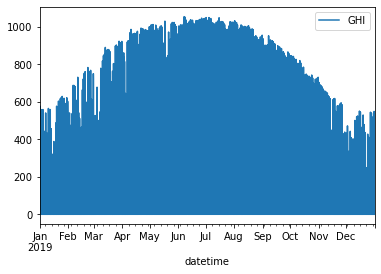

In [35]:
Topaz_solar_GHI_H.plot()

In [37]:
Topaz_solar_GHI_H['GHI'].idxmax()

Timestamp('2019-06-07 12:00:00', freq='H')

In [44]:
Topaz_solar_GHI_H_SP = Topaz_solar_GHI_H['2019-03-01 00:00:00':'2019-05-31 00:00:00']
Topaz_solar_GHI_H_SM = Topaz_solar_GHI_H['2019-06-01 00:00:00':'2019-08-31 00:00:00']
Topaz_solar_GHI_H_AU = Topaz_solar_GHI_H['2019-09-01 00:00:00':'2019-11-30 00:00:00']
Topaz_solar_GHI_H_WT = pd.concat([Topaz_solar_GHI_H['2019-12-01 00:00:00':'2019-12-31 00:00:00'],Topaz_solar_GHI_H['2019-01-01 00:00:00':'2019-02-28 00:00:00']])

In [45]:
SP_PEAK_idx = Topaz_solar_GHI_H_SP['GHI'].idxmax()
SM_PEAK_idx = Topaz_solar_GHI_H_SM['GHI'].idxmax()
AU_PEAK_idx = Topaz_solar_GHI_H_AU['GHI'].idxmax()
WT_PEAK_idx = Topaz_solar_GHI_H_WT['GHI'].idxmax()

In [46]:
print(SP_PEAK_idx,SM_PEAK_idx,AU_PEAK_idx,WT_PEAK_idx)

2019-05-17 11:00:00 2019-06-07 12:00:00 2019-09-07 11:00:00 2019-02-22 12:00:00


In [51]:
Topaz_solar_GHI_H_2019_May_17 = Topaz_solar_GHI_H['2019-05-17 00:00:00':'2019-05-18 00:00:00']
Topaz_solar_GHI_H_2019_June_07 = Topaz_solar_GHI_H['2019-06-07 00:00:00':'2019-06-08 00:00:00']
Topaz_solar_GHI_H_2019_Sept_07 = Topaz_solar_GHI_H['2019-09-07 00:00:00':'2019-09-08 00:00:00']
Topaz_solar_GHI_H_2019_Feb_22 = Topaz_solar_GHI_H['2019-02-22 00:00:00':'2019-02-23 00:00:00']

<AxesSubplot:xlabel='datetime'>

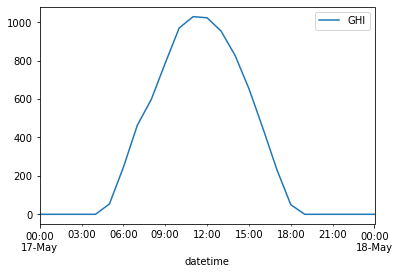

In [52]:
Topaz_solar_GHI_H_2019_May_17.plot()

<AxesSubplot:xlabel='datetime'>

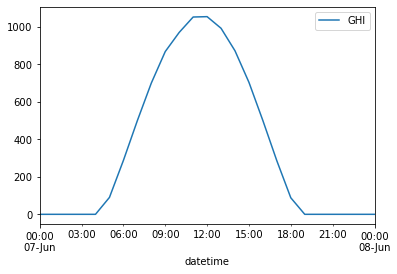

In [53]:
Topaz_solar_GHI_H_2019_June_07.plot()

<AxesSubplot:xlabel='datetime'>

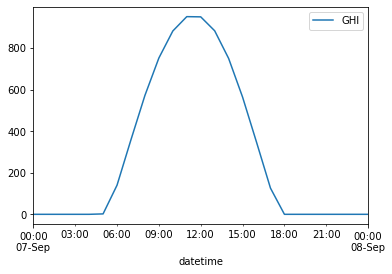

In [54]:
Topaz_solar_GHI_H_2019_Sept_07.plot()

<AxesSubplot:xlabel='datetime'>

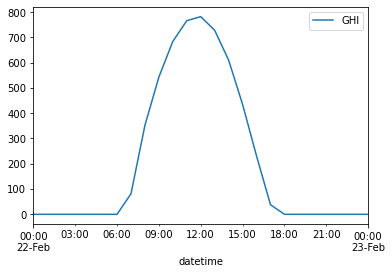

In [55]:
Topaz_solar_GHI_H_2019_Feb_22.plot()

In [56]:
Topaz_solar_GHI_H_2019_May_17.to_csv('Topaz_solar_GHI_H_2019_May_17.csv')
Topaz_solar_GHI_H_2019_June_07.to_csv('Topaz_solar_GHI_H_2019_June_07.csv')
Topaz_solar_GHI_H_2019_Sept_07.to_csv('Topaz_solar_GHI_H_2019_Sept_07.csv')
Topaz_solar_GHI_H_2019_Feb_22.to_csv('Topaz_solar_GHI_H_2019_Feb_22.csv')

In [12]:
Topaz_solar_GHI_H_2019_March_10 = Topaz_solar_GHI_H['2019-03-10 00:00:00':'2019-03-11 00:00:00']

In [13]:
Topaz_solar_GHI_H_2019_March_10

,GHI
datetime,
2019-03-10 00:00:00,0
2019-03-10 01:00:00,0
2019-03-10 02:00:00,0
2019-03-10 03:00:00,0
2019-03-10 04:00:00,0
2019-03-10 05:00:00,0
2019-03-10 06:00:00,13
2019-03-10 07:00:00,182
2019-03-10 08:00:00,366


In [14]:
Topaz_solar_GHI_H_2019_March_09 = Topaz_solar_GHI_H['2019-03-09 00:00:00':'2019-03-10 00:00:00']

In [15]:
Topaz_solar_GHI_H_2019_March_09

,GHI
datetime,
2019-03-09 00:00:00,0
2019-03-09 01:00:00,0
2019-03-09 02:00:00,0
2019-03-09 03:00:00,0
2019-03-09 04:00:00,0
2019-03-09 05:00:00,0
2019-03-09 06:00:00,12
2019-03-09 07:00:00,154
2019-03-09 08:00:00,386


In [16]:
Topaz_solar_GHI_H_2019_Nov_2=Topaz_solar_GHI_H['2019-11-02 00:00:00':'2019-11-03 00:00:00']

In [17]:
Topaz_solar_GHI_H_2019_Nov_2

,GHI
datetime,
2019-11-02 00:00:00,0
2019-11-02 01:00:00,0
2019-11-02 02:00:00,0
2019-11-02 03:00:00,0
2019-11-02 04:00:00,0
2019-11-02 05:00:00,0
2019-11-02 06:00:00,3
2019-11-02 07:00:00,127
2019-11-02 08:00:00,367


In [18]:
Topaz_solar_GHI_H_2019_Nov_3=Topaz_solar_GHI_H['2019-11-03 00:00:00':'2019-11-04 00:00:00']

In [19]:
Topaz_solar_GHI_H_2019_Nov_3

,GHI
datetime,
2019-11-03 00:00:00,0
2019-11-03 01:00:00,0
2019-11-03 02:00:00,0
2019-11-03 03:00:00,0
2019-11-03 04:00:00,0
2019-11-03 05:00:00,0
2019-11-03 06:00:00,3
2019-11-03 07:00:00,108
2019-11-03 08:00:00,358


In [20]:
Topaz_solar_GHI_H_2019_Nov_4=Topaz_solar_GHI_H['2019-11-04 00:00:00':'2019-11-05 00:00:00']

In [21]:
Topaz_solar_GHI_H_2019_Nov_4

,GHI
datetime,
2019-11-04 00:00:00,0
2019-11-04 01:00:00,0
2019-11-04 02:00:00,0
2019-11-04 03:00:00,0
2019-11-04 04:00:00,0
2019-11-04 05:00:00,0
2019-11-04 06:00:00,2
2019-11-04 07:00:00,108
2019-11-04 08:00:00,358
